In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
tf.__version__

'2.8.0'

In [4]:
data = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [5]:
# Address, postcode, SellerG and date seem to be irrelevant => drop those first

In [6]:
data = data.drop(['Address', 'Postcode', 'SellerG', 'Date'], axis = 1)
data.head()

,Suburb,Rooms,Type,Price,Method,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,3,h,1490000.0,S,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,3,h,1220000.0,S,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,3,h,1420000.0,S,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,3,h,1515000.0,S,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,2,h,670000.0,S,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [7]:
data.groupby(by='Suburb').count()

,Rooms,Type,Price,Method,Regionname,Propertycount,Distance,CouncilArea
Suburb,,,,,,,,
Abbotsford,183,183,142,183,183,183,183,183
Aberfeldie,111,111,95,111,111,111,111,111
Airport West,238,238,206,238,238,238,238,238
Albanvale,37,37,20,37,37,37,37,37
Albert Park,185,185,128,185,185,185,185,185
...,...,...,...,...,...,...,...,...
Yarra Junction,1,1,1,1,1,1,1,1
Yarrambat,1,1,0,1,1,1,1,1
Yarraville,432,432,351,432,432,432,432,432


In [8]:
data.groupby(by='Method').count()

,Suburb,Rooms,Type,Price,Regionname,Propertycount,Distance,CouncilArea
Method,,,,,,,,
PI,9790,9790,9790,5940,9790,9790,9790,9790
PN,651,651,651,0,651,651,651,651
S,34063,34063,34063,30624,34063,34063,34063,34063
SA,416,416,416,365,416,416,416,416
SN,2674,2674,2674,0,2674,2674,2674,2674
SP,8916,8916,8916,6480,8916,8916,8916,8916
SS,73,73,73,0,73,73,73,73
VB,5956,5956,5956,5024,5956,5956,5956,5956
W,484,484,484,0,484,484,484,484


In [9]:
data.groupby(by='Regionname').count()

,Suburb,Rooms,Type,Price,Method,Propertycount,Distance,CouncilArea
Regionname,,,,,,,,
Eastern Metropolitan,10396,10396,10396,7585,10396,10396,10396,10396
Eastern Victoria,564,564,564,374,564,564,564,564
Northern Metropolitan,16781,16781,16781,13598,16781,16781,16781,16781
Northern Victoria,556,556,556,455,556,556,556,556
South-Eastern Metropolitan,5212,5212,5212,4010,5212,5212,5212,5212
Southern Metropolitan,17559,17559,17559,12549,17559,17559,17559,17559
Western Metropolitan,11717,11717,11717,9680,11717,11717,11717,11717
Western Victoria,238,238,238,182,238,238,238,238


In [10]:
data.groupby(by='CouncilArea').count()

,Suburb,Rooms,Type,Price,Method,Regionname,Propertycount,Distance
CouncilArea,,,,,,,,
Banyule City Council,3656,3656,3656,2902,3656,3656,3656,3656
Bayside City Council,3331,3331,3331,2495,3331,3331,3331,3331
Boroondara City Council,5132,5132,5132,3455,5132,5132,5132,5132
Brimbank City Council,3296,3296,3296,2720,3296,3296,3296,3296
Cardinia Shire Council,88,88,88,52,88,88,88,88
Casey City Council,503,503,503,343,503,503,503,503
Darebin City Council,4182,4182,4182,3462,4182,4182,4182,4182
Frankston City Council,835,835,835,656,835,835,835,835
Glen Eira City Council,2934,2934,2934,2351,2934,2934,2934,2934


In [11]:
# Since Suburb and CouncilArea have a lot of distinct values with low counts, it is reasonable to drop those columns as well

In [12]:
data = data.drop(['Suburb', 'CouncilArea'], axis = 1)
data.head()

,Rooms,Type,Price,Method,Regionname,Propertycount,Distance
0,3,h,1490000.0,S,Northern Metropolitan,4019,3.0
1,3,h,1220000.0,S,Northern Metropolitan,4019,3.0
2,3,h,1420000.0,S,Northern Metropolitan,4019,3.0
3,3,h,1515000.0,S,Western Metropolitan,1543,7.5
4,2,h,670000.0,S,Western Metropolitan,3464,10.4


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          63023 non-null  int64  
 1   Type           63023 non-null  object 
 2   Price          48433 non-null  float64
 3   Method         63023 non-null  object 
 4   Regionname     63023 non-null  object 
 5   Propertycount  63023 non-null  int64  
 6   Distance       63023 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 3.4+ MB


In [14]:
# use LabelEncoder for Type, Method, and RegionName

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
data.Type = labelencoder.fit_transform(data.Type)
labelencoder = LabelEncoder()
data.Method = labelencoder.fit_transform(data.Method)
labelencoder = LabelEncoder()
data.Regionname = labelencoder.fit_transform(data.Regionname)
data.head()

,Rooms,Type,Price,Method,Regionname,Propertycount,Distance
0,3,0,1490000.0,2,2,4019,3.0
1,3,0,1220000.0,2,2,4019,3.0
2,3,0,1420000.0,2,2,4019,3.0
3,3,0,1515000.0,2,6,1543,7.5
4,2,0,670000.0,2,6,3464,10.4


In [16]:
data.isnull().sum()

Rooms                0
Type                 0
Price            14590
Method               0
Regionname           0
Propertycount        0
Distance             0
dtype: int64

In [17]:
# rows where the price is null, use as prediction

In [18]:
predict = data[data['Price'].isnull()]
predict.shape

(14590, 7)

In [19]:
data = data.drop(predict.index)
data.shape

(48433, 7)

In [20]:
# split data

In [21]:
df_train = data.sample(frac=0.7, random_state = 0)
df_valid = data.drop(df_train.index)
X_train = df_train.drop('Price', axis = 1)
X_valid = df_valid.drop('Price', axis = 1)
y_train = df_train['Price']
y_valid = df_valid['Price']
print(X_train.shape)
print(X_valid.shape)

(33903, 6)
(14530, 6)


In [22]:
predict = predict.drop('Price', axis = 1)
predict.head()

,Rooms,Type,Method,Regionname,Propertycount,Distance
8,6,0,0,6,1899,14.0
15,4,0,4,6,7630,15.5
24,4,0,2,5,3052,10.2
29,4,0,4,2,1130,16.5
38,3,0,5,5,7809,9.7


In [23]:
X_train.head()

,Rooms,Type,Method,Regionname,Propertycount,Distance
30430,2,0,2,6,3755,10.5
35555,3,0,5,6,1281,12.8
49947,3,0,2,2,2651,11.2
35008,3,0,2,0,10788,24.8
27506,3,0,2,6,3873,6.4


In [24]:
# big data with uneven range => use Standard Scaler

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_train

array([[-1.14515848, -0.61009254, -0.34441561,  1.20391121, -0.85350882,
        -0.28894115],
       [-0.07735387, -0.61009254,  1.19206261,  1.20391121, -1.41030723,
         0.01739649],
       [-0.07735387, -0.61009254, -0.34441561, -0.6815161 , -1.10197505,
        -0.19570795],
       ...,
       [-1.14515848,  1.90085949, -0.34441561,  0.73255438,  1.28118518,
        -1.02148767],
       [-1.14515848,  0.64538348, -0.34441561, -0.6815161 ,  1.58209038,
        -0.56864073],
       [ 0.99045075, -0.61009254, -0.34441561,  0.73255438, -1.24421296,
        -1.28786823]])

In [26]:
X_valid = sc.transform(X_valid)
predict = sc.transform(predict)

In [27]:
# Build model

In [28]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import Sequential

In [29]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
min_delta=0.001, # minimium amount of change to count as an improvement
patience=20, # how many epochs to wait before stopping
restore_best_weights=True,
)

In [30]:
def build_ANN():
  model = Sequential()
  # Adding the input layer and the first hidden layer
  model.add(Dense(units = 256, activation='relu', input_shape=(6,)))
  # model.add(Dropout(rate=0.2))
  # Addding the second hidden layer
  model.add(Dense(units = 512,
  activation='relu'))
  model.add(Dropout(rate=0.2))
  # Addding the third hidden layer
  model.add(Dense(units = 512,
  activation='relu'))
  model.add(Dropout(rate=0.2))
  # Addding the fourth hidden layer
  model.add(Dense(units = 512,
  activation='relu'))
  model.add(Dropout(rate=0.2))
  # Addding the fifth hidden layer
  model.add(Dense(units = 512,
  activation='relu'))
  model.add(Dropout(rate=0.2))
  # Addding the sixth hidden layer
  model.add(Dense(units = 512,
  activation='relu'))
  # model.add(Dropout(rate=0.2))
  # Addding the seventh hidden layer
  model.add(Dense(units = 512,
  activation='relu'))
  # model.add(Dropout(rate=0.2))
  # Adding the output layer
  model.add(Dense(units = 1,
  activation='relu'))
  #compiling ANN
  model.compile(optimizer='adam', loss='mae', \
  metrics=['mse', 'mae'])
  return model

In [31]:
model = build_ANN()

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1792      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0

In [33]:
history = model.fit(X_train, y_train, epochs = 150, batch_size=32, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Epoch 1/150
1060/1060 [==============================] - 23s 21ms/step - loss: 301078.3438 - mse: 233439199232.0000 - mae: 301078.3438 - val_loss: 219455.3281 - val_mse: 137684664320.0000 - val_mae: 219455.3281
Epoch 2/150
1060/1060 [==============================] - 22s 20ms/step - loss: 227028.0781 - mse: 142995750912.0000 - mae: 227028.0781 - val_loss: 209772.1562 - val_mse: 138958618624.0000 - val_mae: 209772.1562
Epoch 3/150
1060/1060 [==============================] - 22s 21ms/step - loss: 220992.7812 - mse: 137970417664.0000 - mae: 220992.7812 - val_loss: 212028.4844 - val_mse: 141777633280.0000 - val_mae: 212028.4844
Epoch 4/150
1060/1060 [==============================] - 24s 22ms/step - loss: 219195.3125 - mse: 135993819136.0000 - mae: 219195.3125 - val_loss: 207409.8281 - val_mse: 126479671296.0000 - val_mae: 207409.8281
Epoch 5/150
1060/1060 [==============================] - 23s 22ms/step - loss: 217822.1406 - mse: 135774912512.0000 - mae: 217822.1406 - val_loss: 204506.26

Minimum validation loss: 185498.828125


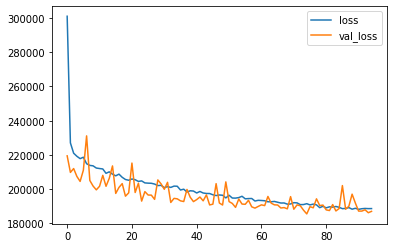

In [34]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print('Minimum validation loss: {}'.format(history_df['val_loss'].min()))

In [35]:
data['Price'].std()

593498.9190372757

In [36]:
# we can accept the result, since the std is around 600k

In [37]:
y_valid_hat = model.predict(X_valid)
y_valid_hat[:10]

array([[1320736.5 ],
       [ 572148.5 ],
       [1028611.56],
       [1086939.6 ],
       [ 661600.6 ],
       [ 430447.28],
       [1107230.9 ],
       [ 996024.1 ],
       [ 891106.7 ],
       [1692584.6 ]], dtype=float32)

In [38]:
y_valid[:10]

2     1420000.0
5      530000.0
11     717000.0
12    1675000.0
14     860000.0
21     355000.0
22    1123100.0
23    1270000.0
30     825000.0
34    2035000.0
Name: Price, dtype: float64

In [39]:
# predict new data, using data 'predict'

In [40]:
y_new = model.predict(predict)
y_new[:10]

array([[ 811407.  ],
       [ 660405.9 ],
       [1829404.1 ],
       [ 738359.1 ],
       [1523448.1 ],
       [1738703.8 ],
       [ 846595.4 ],
       [1011884.06],
       [ 674156.06],
       [1258664.1 ]], dtype=float32)